# **Import Libraries**

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc


import tensorflow as tf
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

import warnings
warnings.filterwarnings("ignore")

# **Data Preprocessing**


In [48]:
cifar10=tf.keras.datasets.cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [50]:
X_train.shape


(40000, 32, 32, 3)

In [51]:
X_test.shape


(10000, 32, 32, 3)

In [52]:
y_train.shape


(40000, 1)

In [53]:
y_test.shape

(10000, 1)

In [54]:
# Size of one image
X_train[0].shape

(32, 32, 3)

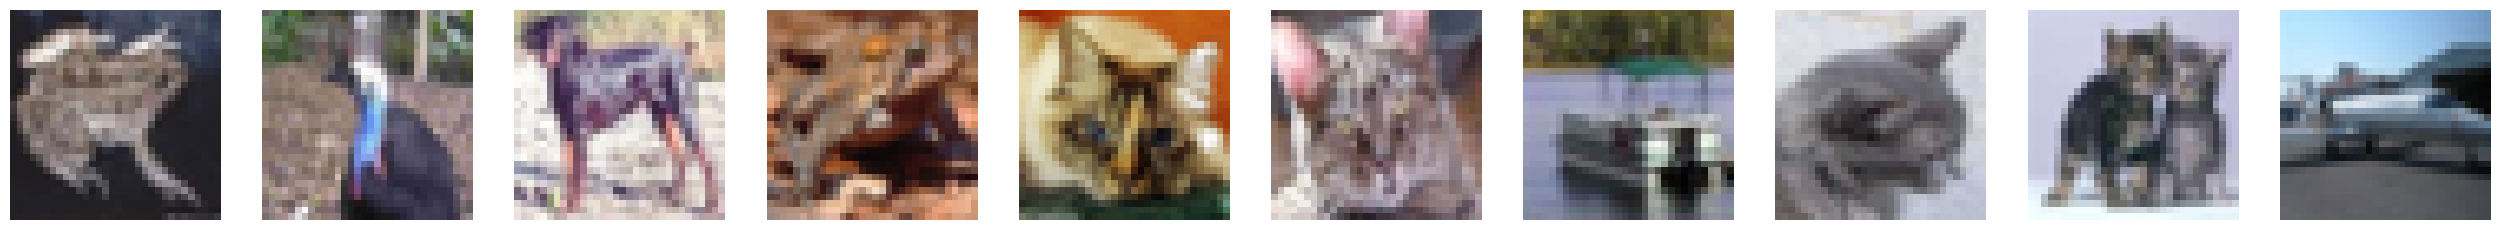

In [55]:
plt.figure(figsize=(32,3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [56]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [57]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# **Training a Model**

# **K-Nearest Neighbors (KNN)**

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flat, y_train)
y_pred_knn = knn.predict(X_val_flat)

In [59]:
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))

KNN Accuracy: 0.3215


In [60]:
print("KNN Precision:", precision_score(y_val, y_pred_knn, average='weighted'))

KNN Precision: 0.4234140306596751


In [61]:
print("KNN Recall:", recall_score(y_val, y_pred_knn, average='weighted'))

KNN Recall: 0.3215


In [62]:
print("KNN F1 Score:", f1_score(y_val, y_pred_knn, average='weighted'))

KNN F1 Score: 0.3077549579003984


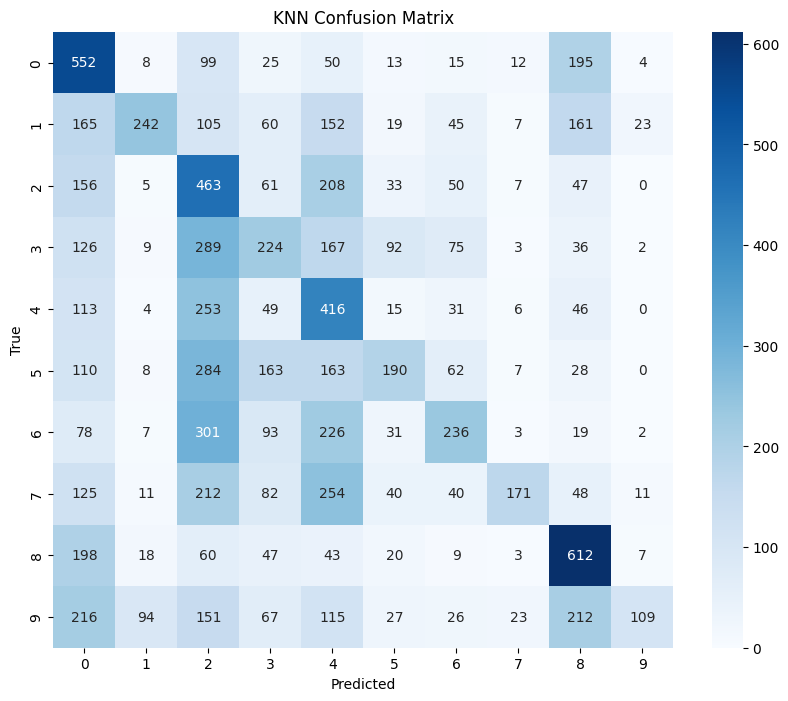

In [63]:
cm = confusion_matrix(y_val, y_pred_knn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

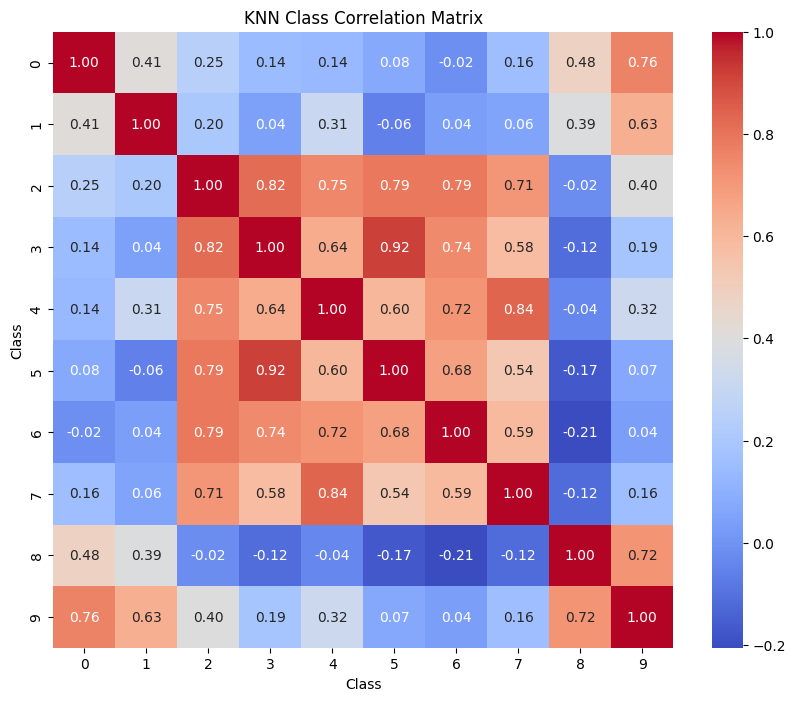

In [64]:
correlation_matrix = np.corrcoef(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Class')
plt.ylabel('Class')
plt.title('KNN Class Correlation Matrix')
plt.show()

# **Support Vector Machine (SVM)**

In [65]:
subset_size = int(0.1 * X_train_flat.shape[0])
X_train_subset = X_train_flat[:subset_size]
y_train_subset = y_train[:subset_size]

In [66]:
svm = SVC()
svm.fit(X_train_subset, y_train_subset.ravel())
y_pred_svm = svm.predict(X_val_flat)

In [67]:
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))


SVM Accuracy: 0.4287


In [68]:
print("SVM Precision:", precision_score(y_val, y_pred_svm, average='weighted'))


SVM Precision: 0.4265764216695301


In [69]:
print("SVM Recall:", recall_score(y_val, y_pred_svm, average='weighted'))


SVM Recall: 0.4287


In [70]:
print("SVM F1 Score:", f1_score(y_val, y_pred_svm, average='weighted'))

SVM F1 Score: 0.42575629876140736


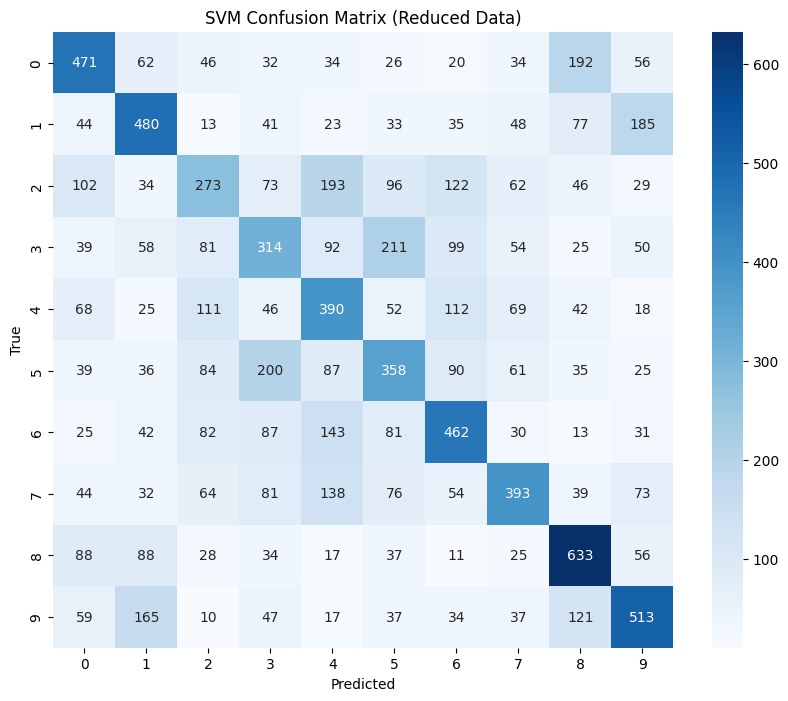

In [71]:
cm_svm = confusion_matrix(y_val, y_pred_svm)


plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix (Reduced Data)')
plt.show()

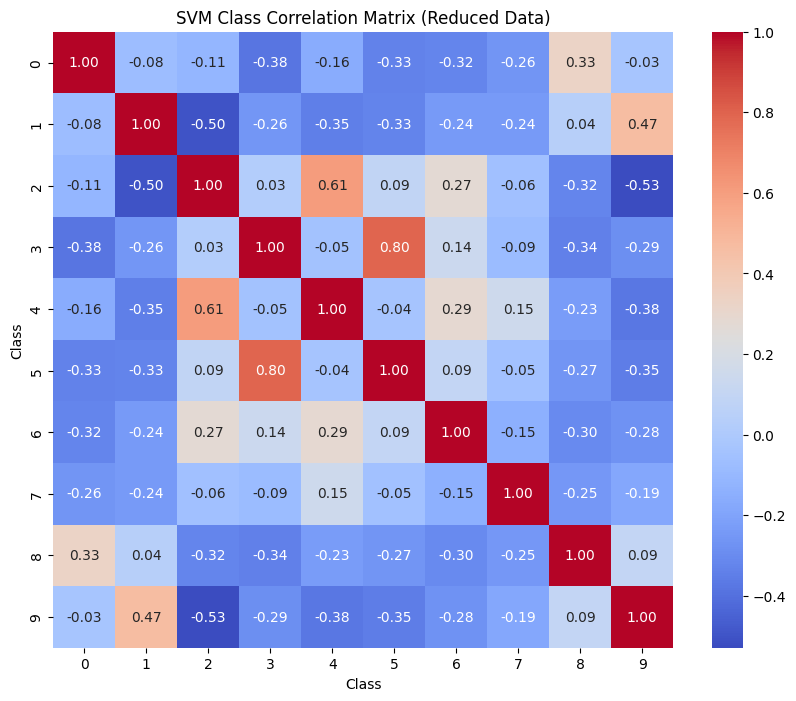

In [72]:
correlation_matrix_svm = np.corrcoef(cm_svm)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_svm, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Class')
plt.ylabel('Class')
plt.title('SVM Class Correlation Matrix (Reduced Data)')
plt.show()

# **Deep Learning - Simple Artificial Neural Network (ANN)**

In [73]:
# Etiketleri one-hot encode yapıyoruz.
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [74]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [75]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9176 - accuracy: 0.3119 - val_loss: 1.7786 - val_accuracy: 0.3618
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7613 - accuracy: 0.3685 - val_loss: 1.7506 - val_accuracy: 0.3655
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7102 - accuracy: 0.3909 - val_loss: 1.6918 - val_accuracy: 0.3925
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6801 - accuracy: 0.4010 - val_loss: 1.6844 - val_accuracy: 0.3925
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6509 - accuracy: 0.4090 - val_loss: 1.6836 - val_accuracy: 0.3896
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6328 - accuracy: 0.4139 - val_loss: 1.6146 - val_accuracy: 0.4194
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6174 - accuracy: 0.4232 - val_loss: 1.6406 - val_accuracy:

In [77]:
y_pred_dl = np.argmax(model.predict(X_val), axis=-1)


313/313 [==============================] - 1s 2ms/step


In [78]:
y_val_labels = np.argmax(y_val, axis=-1)

In [79]:
print("Deep Learning Accuracy:", accuracy_score(y_val_labels, y_pred_dl))
print("Deep Learning Precision:", precision_score(y_val_labels, y_pred_dl, average='weighted'))
print("Deep Learning Recall:", recall_score(y_val_labels, y_pred_dl, average='weighted'))
print("Deep Learning F1 Score:", f1_score(y_val_labels, y_pred_dl, average='weighted'))

Deep Learning Accuracy: 0.4197
Deep Learning Precision: 0.4168106609723659
Deep Learning Recall: 0.4197
Deep Learning F1 Score: 0.41093572644470006
